In [1]:
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
from hydromt_sfincs import SfincsModel
from matplotlib import animation

In [2]:
# select the example model
sfincs_root = Path(r"model/base")  # (relative) path to sfincs root
model = SfincsModel(sfincs_root, mode="r")

In [3]:
model.read_results()

print(model.results.keys())

dict_keys(['inp', 'msk', 'zb', 'zs', 'zsmax', 'total_runtime', 'average_dt'])


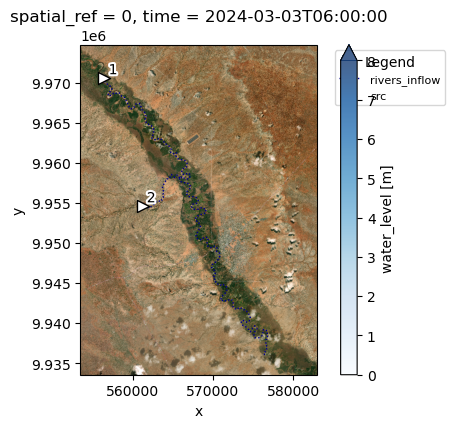

In [4]:
_ = model.plot_basemap(variable='',bmap='sat', zoomlevel=15, plot_bounds=False)

# id is the number of timesteps times 5 minutes. 30 is 2.5 hours in the simulation
id = 30 # first output timestep

model.results["zs"][id,:,:].plot(vmin = 0, vmax = 8, cmap = 'Blues', alpha=0.75)
# zs is waterlevel, id is the time, vmin and vmax is the range of the waterlevel.

In [5]:
# Create quick video
da_zs = model.results["zs"].copy()

step = 1  # one frame every <step> dtout
cbar_kwargs = {"shrink": 0.6, "anchor": (0, 0)}

def update_plot(i, da_zs, cax_h):
    da_zs = da_zs.isel(time=i)
    t = da_zs.time.dt.strftime("%d-%B-%Y %H:%M:%S").item()
    ax.set_title(f"SFINCS water depth {t}")
    cax_h.set_array(da_zs.values.ravel())

fig, ax = model.plot_basemap(
    fn_out=None, variable="", bmap="sat", plot_bounds=False, figsize=(7, 7)
)
cax_h = da_zs.isel(time=0).plot(x="x", y="y", ax=ax, vmin=0, vmax=8, 
    cmap=plt.cm.Blues, alpha=0.75, cbar_kwargs=cbar_kwargs)
plt.close()  # to prevent double plot

ani = animation.FuncAnimation(
    fig,
    update_plot,
    frames=np.arange(0, da_zs.time.size, step),
    interval=250,  # ms between frames
    fargs=(da_zs, cax_h,),
)

# to show in notebook:
from IPython.display import HTML

HTML(ani.to_html5_video())